In [61]:
%matplotlib inline

In [92]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import pickle
from causality.analysis.dataframe import CausalDataFrame
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='hangulu', api_key='78VR3oagCeoHkdYiKB4b')

Open the data from past notebooks and correct them to only include years that are common between the data structures (>1999).

In [77]:
with open('VariableData/money_data.pickle', 'rb') as f:
    income_data, housing_data, rent_data = pickle.load(f)
with open('VariableData/demographic_data.pickle', 'rb') as f:
    demographic_data = pickle.load(f)
with open('VariableData/endowment.pickle', 'rb') as f:
    endowment = pickle.load(f)
with open('VariableData/expander.pickle', 'rb') as f:
    expander = pickle.load(f)

In [78]:
endowment = endowment[endowment['FY'] > 1997].reset_index()
endowment.drop('index', axis=1, inplace=True)

demographic_data = demographic_data[demographic_data['year'] > 1999].reset_index()
demographic_data.drop('index', axis=1, inplace=True)

income_data = income_data[income_data['year'] > 1999].reset_index()
income_data.drop('index', axis=1, inplace=True)

housing_data = housing_data[housing_data['year'] > 1999].reset_index()
housing_data.drop('index', axis=1, inplace=True)

rent_data = rent_data[rent_data['year'] > 1999].reset_index()
rent_data.drop('index', axis=1, inplace=True)

Define a function to graph (and perform linear regression on) a given set of data.

In [97]:
def grapher(x, y, city, title, ytitle, xtitle, filename):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fit = slope * x + intercept

    trace0 = go.Scatter(
                x = x,
                y = y,
                mode = 'markers',
                name=city,
                marker=go.Marker(color='rgb(255, 127, 14)')
            )
    fit0 = go.Scatter(
                      x = x,
                      y = fit,
                      mode='lines',
                      marker=go.Marker(color='rgb(30, 55, 153)'),
                      name='Fit'
                      )

    data = [trace0, fit0]

    layout = go.Layout(
                title = title,
                yaxis=dict(
                    title=ytitle
                ),
                xaxis=dict(
                    title=xtitle)
            )

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename=filename)

Investigate the connection between the endowment's value and the Black population in Cambridge, controlling for rent and housing prices.

In [85]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(demographic_data['c_black']).as_matrix()
z1 = pd.to_numeric(rent_data['cambridge']).as_matrix()
z2 = pd.to_numeric(housing_data['cambridge']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

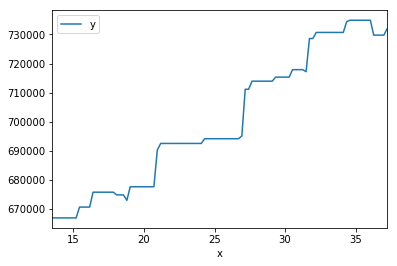

In [114]:
endow_black = grapher(x, y, "Cambridge", "The Connection Between Endowment and Black Population", "Black Population of Cambridge", "Endowment ($B)", "endow_black")
causal_endow_black = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line')

Investigate the connection between the endowment's value and the housing prices in Cambridge, controlling for growth of the population.

In [111]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(housing_data['cambridge']).as_matrix()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

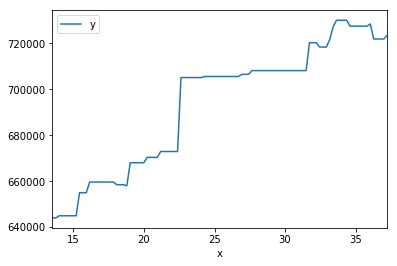

In [117]:
endow_housing = grapher(x, y, "Cambridge", "The Connection Between Endowment and Housing Prices", "Housing Prices in Cambridge", "Endowment ($B)", "endow_housing")
causal_endow_housing = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line')

Investigate the connection between the endowment's value and the rent prices in Cambridge, controlling for growth of the population.

In [118]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(rent_data['cambridge']).as_matrix()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

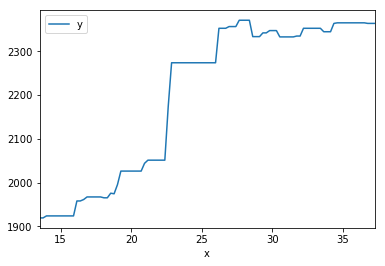

In [121]:
endow_rent = grapher(x, y, "Cambridge", "The Connection Between Endowment and Rent", "Rent in Cambridge", "Endowment ($B)", "endow_rent")
causal_endow_rent = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line')

Investigate the connection between the amount Harvard pays the city of Cambridge per year (PILOT) and the rent prices in Cambridge, controlling for growth of the population.

In [128]:
x = pd.to_numeric(expander['Payments to City']).as_matrix()
y = pd.to_numeric(rent_data['cambridge']).as_matrix()
# Remove the last two elements of the other arrays – PILOT data is not sufficient otherwise.
y = y[:-2].copy()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z1 = z1[:-2].copy()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
z2 = z2[:-2].copy()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

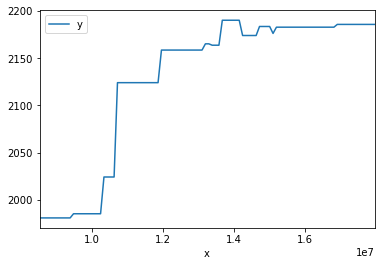

In [134]:
pilot_rent = grapher(x, y, "Cambridge", "The Connection Between Harvard's PILOT and Rent", "Rent in Cambridge", "PILOT ($)", "pilot_rent")
causal_endow_rent = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line')